### https://techblog-history-younghunjo1.tistory.com/368

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Element-wise product, Broadcasting

In [2]:
# element-wise product
# 동일한 위치의 원소들끼리 연산하는 것
a = np.array([1,2,3])
b = np.array([4,5,6])

print(a + b)
print(a - b)
print(a * b)
print(a / b)

[5 7 9]
[-3 -3 -3]
[ 4 10 18]
[0.25 0.4  0.5 ]


In [3]:
# Broadcasting
# 두 배열의 형상(shape)이 달라도 계산이 진행되는 현상
a = np.arange(3)
b = np.array([5])

print("a{}: {} / b{}: {} / {}".format(a.shape, a, b.shape, b, a + b))

a(3,): [0 1 2] / b(1,): [5] / [5 6 7]


In [4]:
a = np.ones((3,3))
b = np.arange(3)

print("a{}: {} / b{}: {} / {}".format(a.shape, a, b.shape, b, a + b))

a(3, 3): [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] / b(3,): [0 1 2] / [[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]


In [5]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)

print("a{}: {} / b{}: {} = {}".format(a.shape, a, b.shape, b, a + b))

a(3, 1): [[0]
 [1]
 [2]] / b(3,): [0 1 2] = [[0 1 2]
 [1 2 3]
 [2 3 4]]


# 2. Weight, Bias

In [6]:
# Weight
# 모델이 학습하려는 목표
# 각 입력신호가 결과에 주는 영향력을 조절하는 요소
# 가중치가 클수록 해당 입력(변수) 신호가 중요함을 뜻한다.

In [7]:
# Bias
# 결과(출력)값을 얼마나 쉽게 활성화 시킬 것인가에 대한 요소
# 활성화 ? 이진분류에서의 1을 의미
# 입력신호가 2개 파라미터가 2개 이고, 결과값은 0과 1로 나와야 할 때
# 각 각의 입력신호는 각 각의 파라미터와 곱해지고 이들의 곱을 합하여 특정 입계값에 따라 0과 1로 나누어지게 된다.
# 여기서의 임계값은 우리가 스스로 줄 수 있는데, 이는 곧 각 입력신호와 각 파라미터를 곱하여 합산한 결과값의 영향을 얼마나 줄지에 대한 중요도를 뜻한다.
# 결론적으로 Bias를 어떻게 정의하느냐에 따라 결과값이 0으로 나올지, 1로 나올지를 좌우할 수 있다.
# 그래서 이를 너무 크게 하거나 작게 한다면 어떠한 하나의 결과로 치울칠 수 있다라는 의미로 편향이라는 의미가 붙었다.

# Weight는 입력신호의 중요도, Bias는 결과값의 중요도 잘 알아두자

# 3. Simple Neural Network

In [8]:
# 신경망은 단층 퍼셉트론에 활성화 함수를 추가한 것을 의미한다. 이 활성화 함수가 추가된 단층 퍼셉트로을 여러개 쌓으면 다층 퍼셉트론이 되고,
# 이를 우리는 딥러닝 신경망이라고 부른다

## 1. Activation Function

In [9]:
def view_vector(x, y):
    plt.plot(x, y)
    plt.ylim(-0.1, 1.1)
    plt.show()

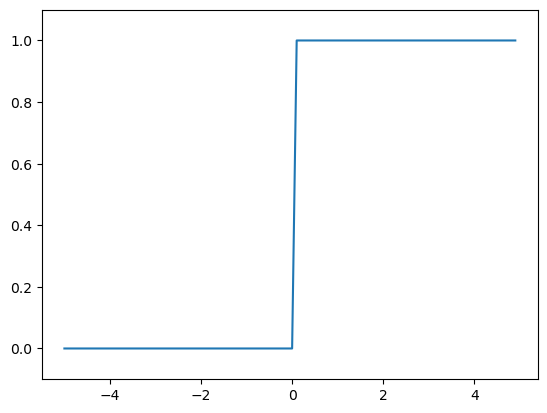

In [10]:
# 1. Step Function
# 0과 1만 존재하는 함수, 미분이 불가능하다는 특징 때문에 사용되지 않는다.
def step_function(x):
    y = x > 0
    return y.astype(int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

view_vector(x, y)

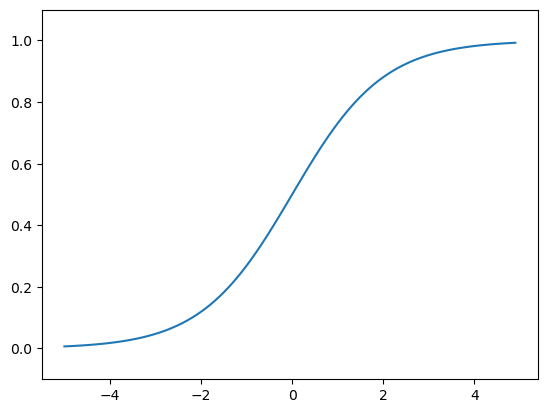

In [11]:
# 2. Sigmoid Function, 분류에 이용됨
# 연속적인 실수값을 나타내줄 수 있는 함수
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

view_vector(x, y)

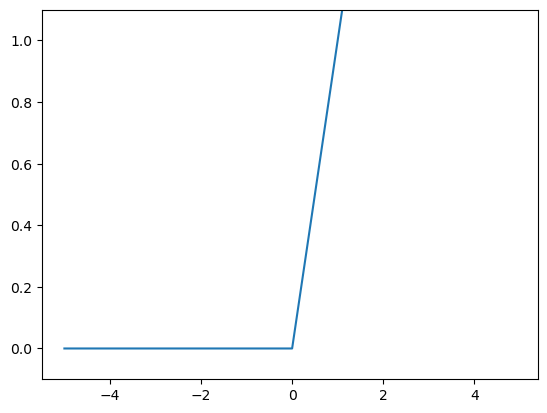

In [12]:
# 3. Relu
# Relu는 전기회로 분야의 용어로, +/-가 반복되는 교류에서 - 흐름을 차단하는 회로를 의미한다.
# 이를 적용하면,
# x값이 음수(-)일 때의 y값을 모두 차단해서 y = 0으로 만들어 버린다.
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

view_vector(x, y)

In [13]:
# 4. Original softmax
# 다중 클래스 분류에 사용되는 방법이다.
# 모든 입력 신호의 영향을 고려한다는 특징을 가진다.
def softmax_1(a:np.array):
    # 분자
    exp_a = np.exp(a)
    # 분모
    exp_a_sum = np.sum(exp_a)
    y = exp_a / exp_a_sum
    return y

a = np.array([1,2,3])
print(softmax_1(a))

# 지수함수의 값은 매우 크게 증가하기 때문에 Overflow 현상이 발생한다.
a = np.array([10000,10000,100000])
print(softmax_1(a))

[0.09003057 0.24472847 0.66524096]
[nan nan nan]


/var/folders/52/4yvp7r991px0gmq4wyr894j40000gn/T/ipykernel_42148/4269866833.py:6: RuntimeWarning: overflow encountered in exp
  exp_a = np.exp(a)
/var/folders/52/4yvp7r991px0gmq4wyr894j40000gn/T/ipykernel_42148/4269866833.py:9: RuntimeWarning: invalid value encountered in true_divide
  y = exp_a / exp_a_sum


In [14]:
# 5. Advanced softmax
# c_hat 이라는 변수가 추가된다.
# 어떤 수를 더하거나 빼도 상관은 없지만 
# 보통 주어진 입력 데이터 중 최댓값으로 설정한다.
def softmax_2(a:np.array):
    c_hat = max(a)
    # 분자
    exp_a = np.exp(a - c_hat)
    # 분모
    exp_a_sum = np.sum(exp_a)
    y = exp_a / exp_a_sum
    return y

a = np.array([100000,1000,100000])
print(softmax_2(a))

[0.5 0.  0.5]


In [15]:
# 소프트맥스의 결과값의 총 합은 항상 1이다. 때문에, 시그모이드와 마찬가지로
# 결과값을 일종의 클래스 정답 확률을 나타낸다.

## 2. Shape

In [16]:
a = np.random.rand(3,2)
b = np.random.rand(2,4)

print("{} X {} = {}".format(a.shape, b.shape, np.matmul(a,b).shape))

a = np.random.rand(3,2)
b = np.random.rand(2)

print("{} X {} = {}".format(a.shape, b.shape, np.matmul(a,b).shape))

a = np.random.rand(2)
b = np.random.rand(2,4)

print("{} X {} = {}".format(a.shape, b.shape, np.matmul(a,b).shape))

(3, 2) X (2, 4) = (3, 4)
(3, 2) X (2,) = (3,)
(2,) X (2, 4) = (4,)


## 3. Feed-Forward Neural Network (3 Layer)

In [24]:
def relu(x):
    return np.maximum(0, x)

def init_network():
    network = dict()
    network['W1'] = np.random.rand(2,3)
    network['b1'] = np.ones(3,)
    network['W2'] = np.random.rand(3,2)
    network['b2'] = np.ones(2,)
    network['W3'] = np.random.rand(2,1)
    network['b3'] = np.ones(1,)
    
    return network
    
def forward(network, x):
    layer_size = int(len(network.keys()) / 2)
    for layer in range(layer_size):
        weights = network['W{}'.format(layer + 1)]
        bias = network['b{}'.format(layer + 1)]
        
        output = np.matmul(x, weights) + bias
        output = relu(output)
        print("layer {} output shape : {}".format(layer + 1, output.shape))
        
        x = output
        
    return x

network = init_network()
x = np.random.rand(2,2)
output = forward(network, x)

print()
print(output)

layer 1 output shape : (2, 3)
layer 2 output shape : (2, 2)
layer 3 output shape : (2, 1)

[[1.89484966]
 [1.8918321 ]]


## 4. MNIST Usage

In [65]:
from datas.mnist import load_mnist

def get_data():
    (X_train, y_train), (X_test, y_test) = load_mnist(flatten=True, normalize=True, one_hot_label=False)
    return X_test, y_test

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x: np.array):
    max_x = np.max(x)
    exp_x = np.exp(x - max_x)
    exp_x_sum = np.sum(exp_x)
    y = exp_x / exp_x_sum
    return y

def init_network(layer_sizes):
    network = dict()
    for idx, (r, c) in enumerate(layer_sizes):
        network['W{}'.format(idx + 1)] = np.random.rand(r, c)
        network['b{}'.format(idx + 1)] = np.ones(c,)
        
    return network

def forward(network, x):
    layer_size = int(len(network.keys()) / 2)
    for layer in range(layer_size):
        weights = network['W{}'.format(layer + 1)]
        bias = network['b{}'.format(layer + 1)]
        
        output = np.matmul(x, weights) + bias
        if (layer + 1) < layer_size:
            output = sigmoid(output)
#         print("layer {} output shape : {}".format(layer + 1, output.shape))
        
        x = output
        
    x = softmax(x)
        
    return x

X_test, y_test = get_data()
layer_sizes = [(784, 50), (50, 100), (100, 10)]
network = init_network(layer_sizes)
accuracy = 0
for i in range(len(X_test)):
    x = X_test[i]
    y_prob = forward(network, x)
    y_pred = np.argmax(y_prob)
    if y_pred == y_test[i]:
        accuracy += 1

print('Accuracy: {}'.format(accuracy / len(X_test)))

Accuracy: 0.098


In [66]:
# batch_size 적용
X_test, y_test = get_data()
layer_sizes = [(784, 50), (50, 100), (100, 10)]
network = init_network(layer_sizes)
batch_size = 100

accuracy = 0
for i in range(0, len(X_test), batch_size):
    x = X_test[i:i+batch_size]
    y_prob = forward(network, x)
    y_pred = np.argmax(y_prob)
    accuracy += np.sum(y_pred == y_test[i:i+batch_size])

print('Accuracy: {}'.format(accuracy / len(X_test)))

Accuracy: 0.0892
